In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from datetime import datetime

start = datetime(2010,1,1)
end = datetime(2020,12,31)

print(type(start))

<class 'datetime.datetime'>


In [6]:
! pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 107 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 3.8 MB/s eta 0:00:01


In [8]:
import pandas_datareader as pdr

GL = pdr.DataReader(name='005930.KS', data_source='yahoo', start=start, end=end)

GL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,13192.374023
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13404.367188
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13714.202148
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13257.604492
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13388.059570


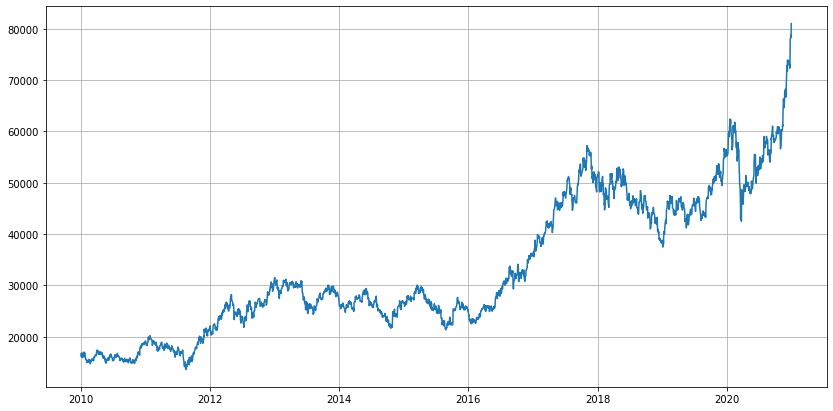

In [10]:
plt.figure(figsize=(14,7))
plt.plot(GL['Close'])
plt.grid()
plt.show()

In [12]:
GL_Trunc = GL[:'2019-12-31']
GL_Trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-23,56400.0,55100.0,56100.0,55500.0,9839252.0,52718.402344
2019-12-24,55700.0,54800.0,55600.0,55000.0,11868463.0,52243.468750
2019-12-26,55400.0,54400.0,54700.0,55400.0,9645034.0,52623.417969
2019-12-27,56900.0,55500.0,55700.0,56500.0,12313056.0,54013.425781
2019-12-30,56600.0,55700.0,56200.0,55800.0,8356767.0,53344.234375


In [14]:
DF = pd.DataFrame({'ds':GL_Trunc.index, 'y':GL_Trunc['Close']})
DF.reset_index(inplace=True)
del DF['Date']
DF.head()

,ds,y
0,2010-01-04,16180.0
1,2010-01-05,16440.0
2,2010-01-06,16820.0
3,2010-01-07,16260.0
4,2010-01-08,16420.0


In [19]:
!pip install fbprophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639961 sha256=8e0eb00d4774cf45db2b75bec4a53605ea1ff2175a3ea7ea38ea6abd45929cb8
  Stored in directory: /home/lab11/.cache/pip/wheels/b6/73/52/ce81340af75aecc56259680433bcfcfb5e941ccd0e28f6e9b0
Successfully built fbprophet


In [20]:
from fbprophet import Prophet

m = Prophet()
m.fit(DF)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods=367)
future.tail()

,ds
2822,2020-12-27
2823,2020-12-28
2824,2020-12-29
2825,2020-12-30
2826,2020-12-31


In [28]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,15634.480109,12403.989876,18212.439209,15634.480109,15634.480109,-276.501847,-276.501847,-276.501847,-84.821489,-84.821489,-84.821489,-191.680358,-191.680358,-191.680358,0.0,0.0,0.0,15357.978262
1,2010-01-05,15638.113818,12763.532750,18344.759019,15638.113818,15638.113818,-284.257309,-284.257309,-284.257309,-42.129673,-42.129673,-42.129673,-242.127636,-242.127636,-242.127636,0.0,0.0,0.0,15353.856509
2,2010-01-06,15641.747526,12727.337645,18020.369758,15641.747526,15641.747526,-391.605280,-391.605280,-391.605280,-107.353446,-107.353446,-107.353446,-284.251833,-284.251833,-284.251833,0.0,0.0,0.0,15250.142247
3,2010-01-07,15645.381235,12606.356902,18056.946522,15645.381235,15645.381235,-410.089214,-410.089214,-410.089214,-92.363191,-92.363191,-92.363191,-317.726023,-317.726023,-317.726023,0.0,0.0,0.0,15235.292021
4,2010-01-08,15649.014944,12387.756000,17914.549633,15649.014944,15649.014944,-460.455839,-460.455839,-460.455839,-118.041509,-118.041509,-118.041509,-342.414330,-342.414330,-342.414330,0.0,0.0,0.0,15188.559105


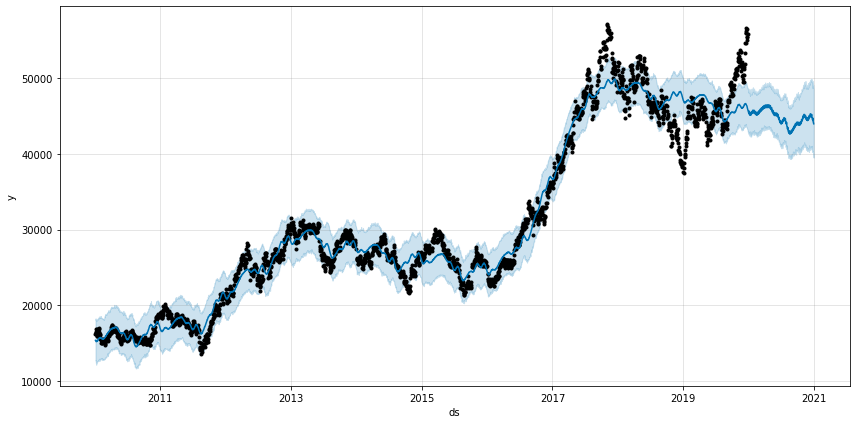

In [24]:
m.plot(forecast, figsize=(12,6));

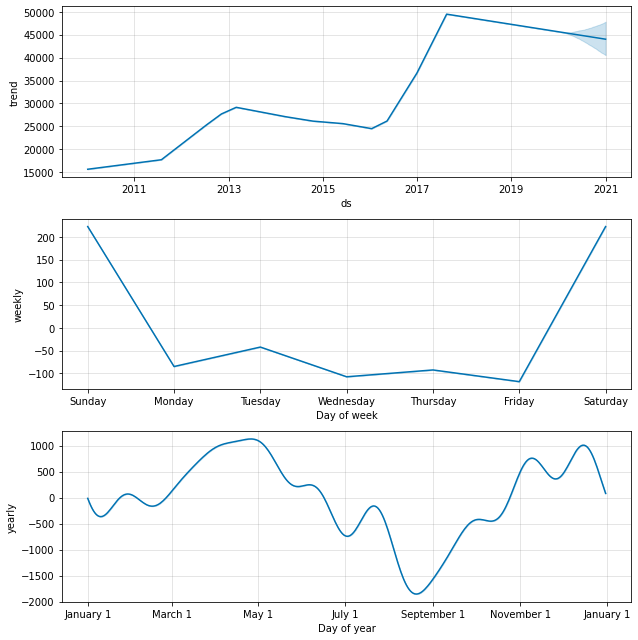

In [25]:
m.plot_components(forecast);

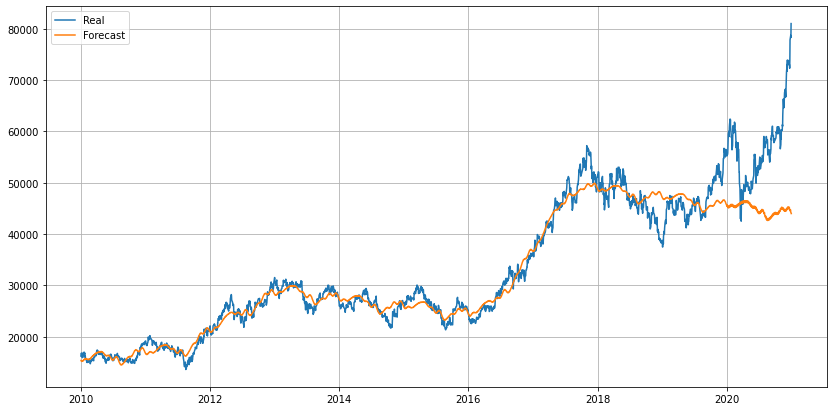

In [27]:
plt.figure(figsize=(14,7))
plt.plot(GL.index, GL['Close'], label='Real')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.grid()
plt.legend()
plt.show()